In [2]:
import pandas as pd 

FILE = '../Data/all_combined.csv'
all_combined = pd.DataFrame.from_csv(FILE)

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [3]:
all_combined.category_no_duplicate = all_combined.category_no_duplicate.str.replace('[','')
all_combined.category_no_duplicate = all_combined.category_no_duplicate.str.replace(']','') 
all_combined.category_no_duplicate = all_combined.category_no_duplicate.str.replace('\'','') 

all_combined.category_no_duplicate = all_combined.category_no_duplicate.str.lower()

In [4]:
len(all_combined)

237046

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
all_combined.groupby('category_no_duplicate')['content'].count().plot.bar(ylim=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<Figure size 2000x600 with 1 Axes>

In [6]:
initial_data = all_combined.groupby('category_no_duplicate')['content'].count().to_frame().reset_index()
initial_data.head()

,category_no_duplicate,content
0,aod,547
1,aoi,3911
2,aoo,53510
3,auctions,43661
4,bids,27460


In [7]:
initial_data = initial_data.rename(columns={'category_no_duplicate': 'category'})
initial_data.head()

,category,content
0,aod,547
1,aoi,3911
2,aoo,53510
3,auctions,43661
4,bids,27460


In [9]:
import pandas as pd 

FILE = '../Data/all_data.csv'
df = pd.DataFrame.from_csv(FILE)

C:\Users\Prime\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [10]:
df.category = df.category.str.lower()

In [11]:
len(df)

937046

In [12]:
caterozied_data = df.groupby('category')['content'].count().to_frame().reset_index()

In [13]:
caterozied_data.head()

,category,content
0,aod,1735
1,aoi,9288
2,aoo,95754
3,auctions,214512
4,bids,76483


In [14]:
caterozied_data = caterozied_data.merge(initial_data, on='category')

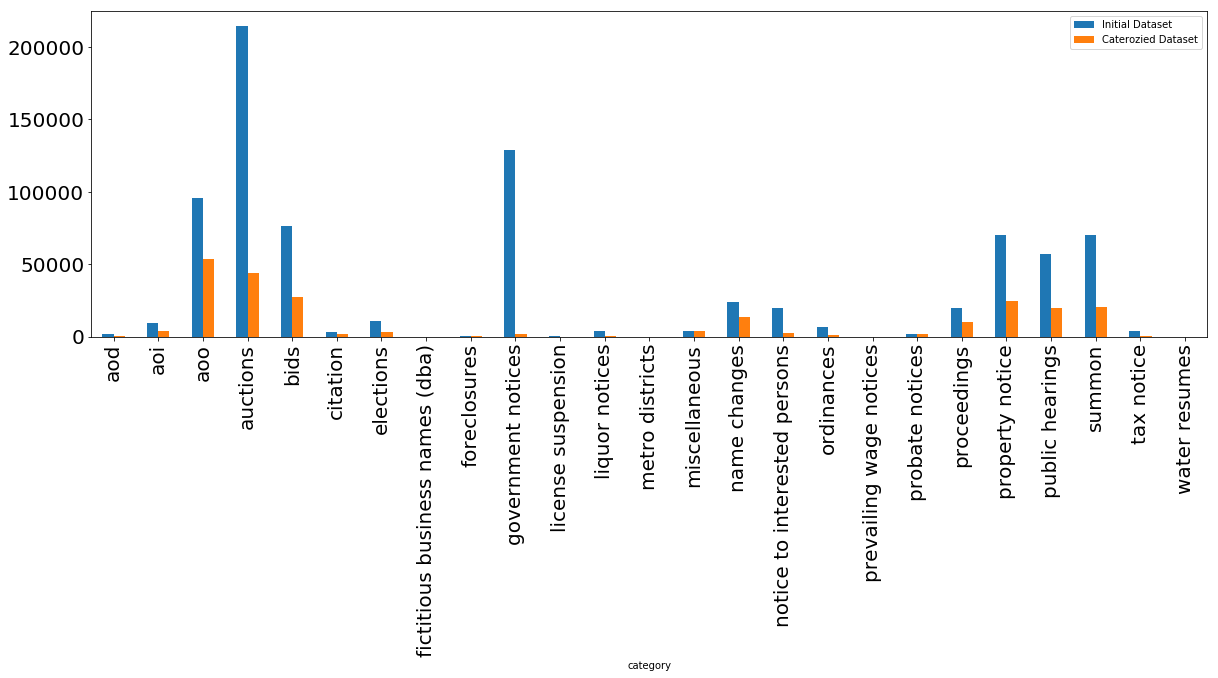

In [15]:
caterozied_data = caterozied_data.rename(columns={'content_x': 'Initial Dataset'})
caterozied_data = caterozied_data.rename(columns={'content_y': 'Caterozied Dataset'})

caterozied_data.plot(x="category", y=["Initial Dataset", "Caterozied Dataset"], kind="bar", figsize=(20,6), fontsize=20)

In [16]:
df.head()

,category,content,county,date,month,newspaper,state,year
0,auctions,"notice of auction on friday, march 17, 2017 a...",Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
1,license suspension,"public notice on october 28, 2015, the pa sta...",Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
2,elections,february 24 legals notice of special elec...,Lincoln,2017/02/24,2,The Ruston Daily Leader,Louisiana,2017
3,auctions,sheriff's sales bank of america na vs. katedra...,St. Bernard,2017/02/24,2,The St. Bernard Voice,Louisiana,2017
4,auctions,sheriff's sales gulf coast bank and trust co v...,St. Bernard,2017/02/24,2,The St. Bernard Voice,Louisiana,2017


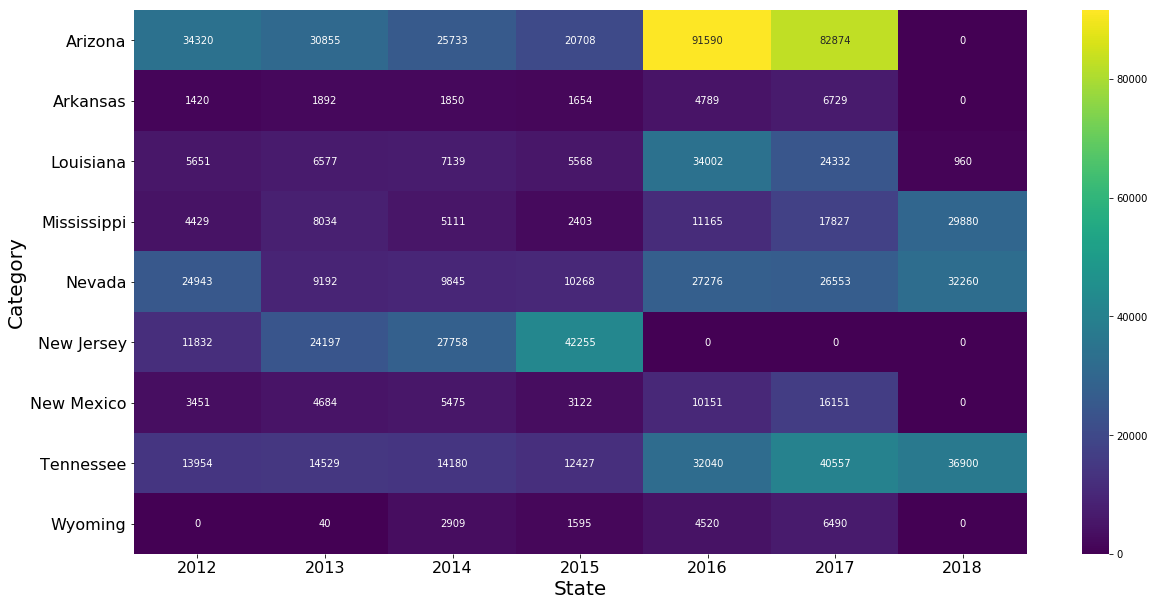

In [18]:
import seaborn as sns

cats = sorted(df.year.unique())

df_temp = pd.crosstab(df['state'], pd.Categorical(df['year'], categories=cats, ordered=True))
plt.figure(figsize=(20,10))
sns.heatmap(df_temp, annot=True, fmt="g", cmap='viridis',)
plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('Category', fontsize=20)
plt.yticks(fontsize=16, rotation=0)
plt.show()

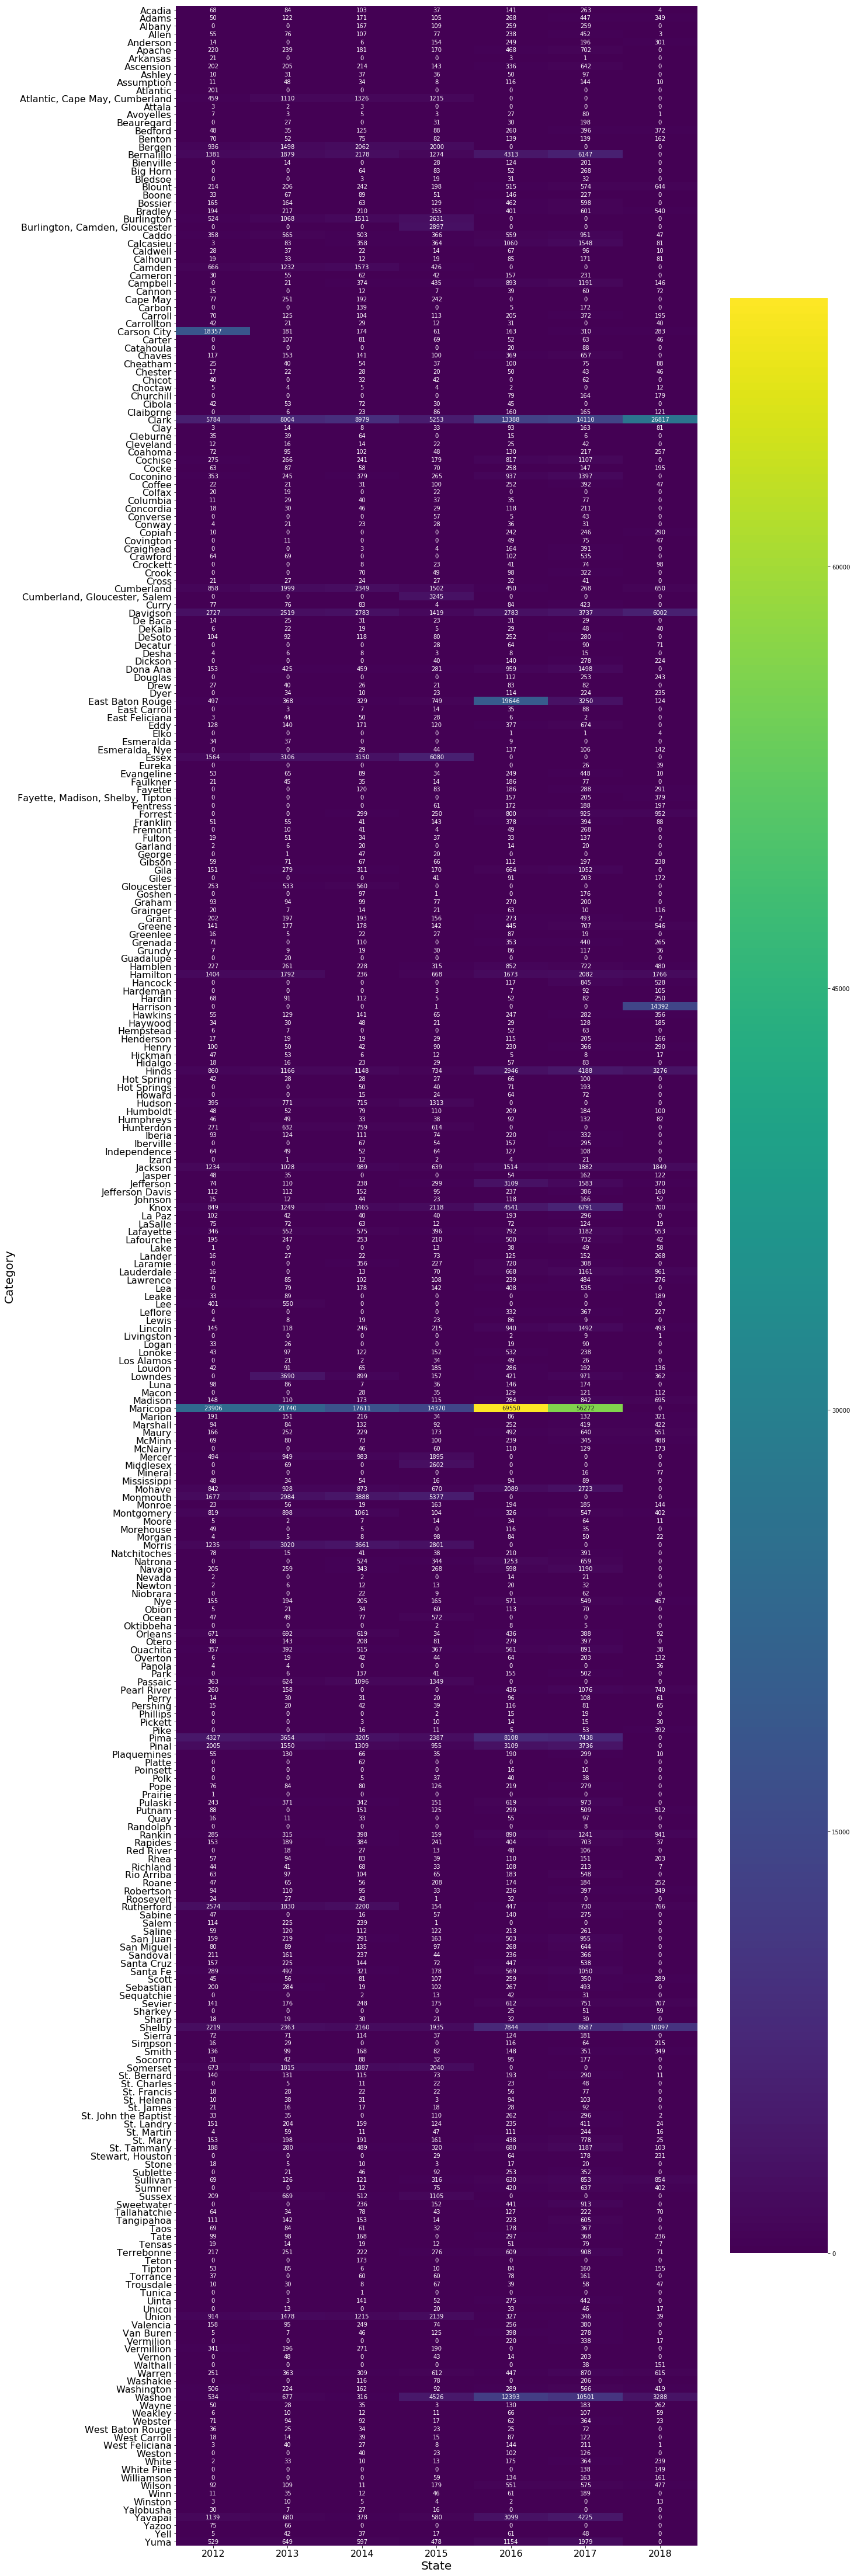

In [19]:
cats = sorted(df.year.unique())

df_temp = pd.crosstab(df['county'], pd.Categorical(df['year'], categories=cats, ordered=True))
plt.figure(figsize=(20,80))
sns.heatmap(df_temp, annot=True, fmt="g", cmap='viridis',)
plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('Category', fontsize=20)
plt.yticks(fontsize=16, rotation=0)
plt.show()

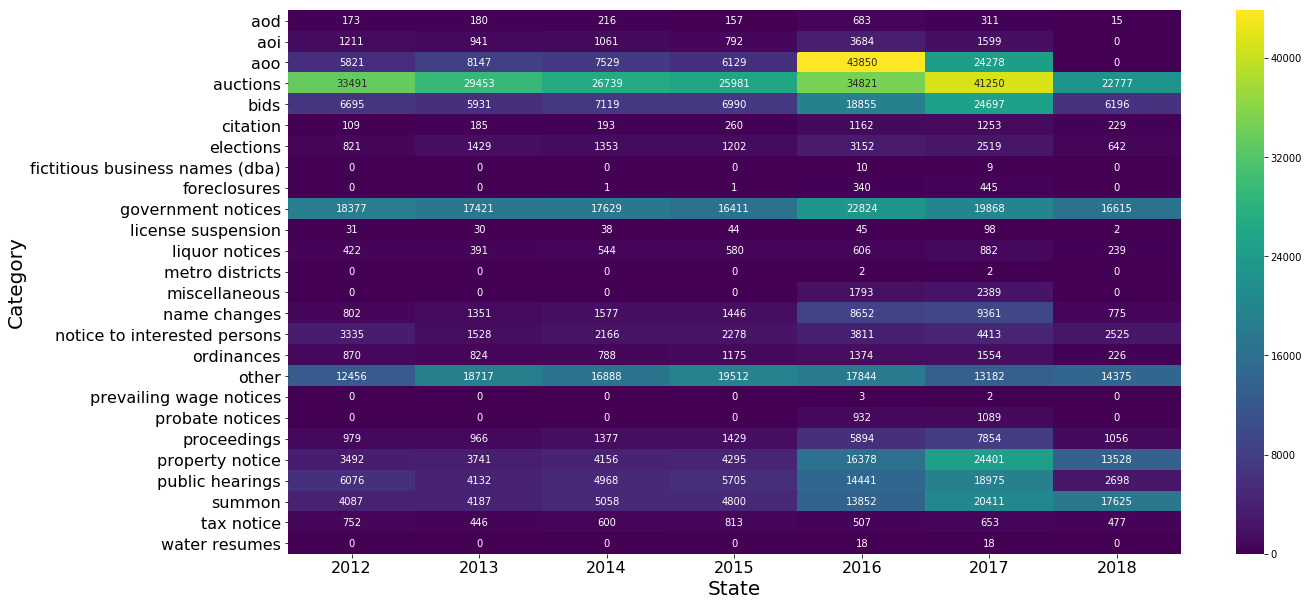

In [20]:
cats = sorted(df.year.unique())

df_temp = pd.crosstab(df['category'], pd.Categorical(df['year'], categories=cats, ordered=True))
plt.figure(figsize=(20,10))
sns.heatmap(df_temp, annot=True, fmt="g", cmap='viridis',)
plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('Category', fontsize=20)
plt.yticks(fontsize=16)
plt.show()

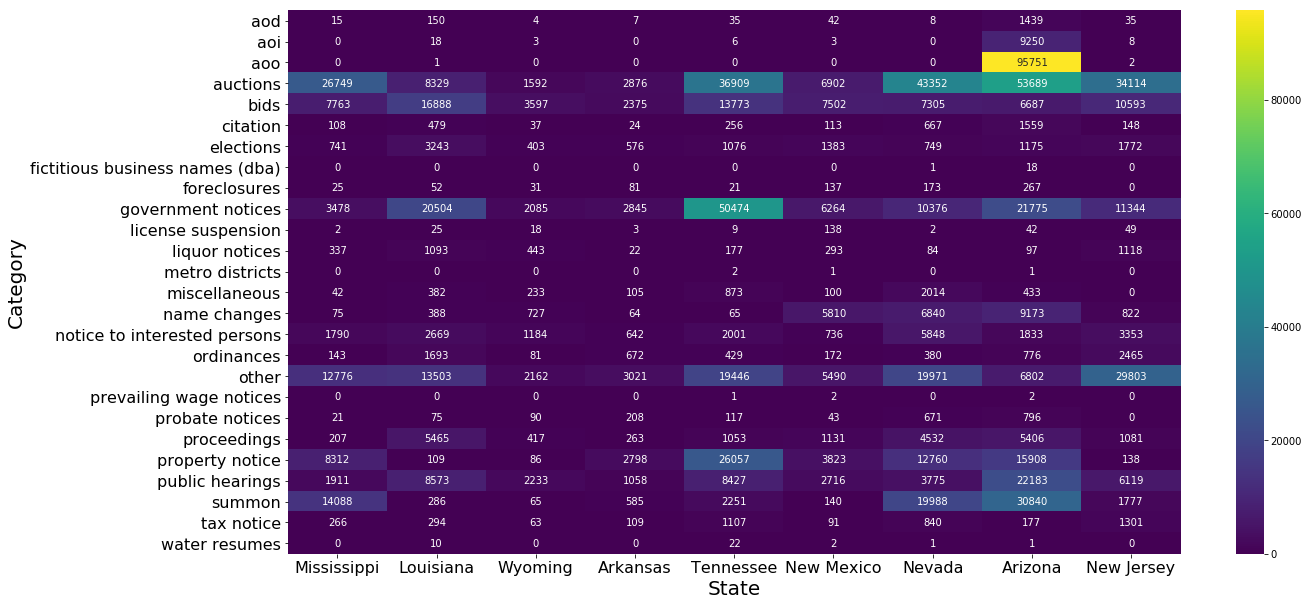

In [21]:
cats = df.state.unique()

df_temp = pd.crosstab(df['category'], pd.Categorical(df['state'], categories=cats, ordered=True))
plt.figure(figsize=(20,10))
sns.heatmap(df_temp, annot=True, fmt="g", cmap='viridis',)
plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('Category', fontsize=20)
plt.yticks(fontsize=16)
plt.show()

In [2]:
df_temp = df

In [22]:
df.content = df.content.str.replace('/',' ') 
df.content = df.content.str.replace(',',' ') 
df.content = df.content.str.replace('(',' ')
df.content = df.content.str.replace(')',' ') 
df.content = df.content.str.replace('"','\'') 

In [4]:
# df = df[['category_no_duplicate_str','content']]
# df = df.rename(columns={'category_no_duplicate_str':'category'})

In [23]:
df.category = df.category.str.replace('[','') 
df.category = df.category.str.replace(']','') 
df.category = df.category.str.replace('\'','')
df.category = df.category.str.lower()

In [24]:
df.head()

,category,content,county,date,month,newspaper,state,year
0,auctions,notice of auction on friday march 17 2017 a...,Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
1,license suspension,public notice on october 28 2015 the pa sta...,Pearl River,2017/02/24,2,Picayune Item,Mississippi,2017
2,elections,february 24 legals notice of special elec...,Lincoln,2017/02/24,2,The Ruston Daily Leader,Louisiana,2017
3,auctions,sheriff's sales bank of america na vs. katedra...,St. Bernard,2017/02/24,2,The St. Bernard Voice,Louisiana,2017
4,auctions,sheriff's sales gulf coast bank and trust co v...,St. Bernard,2017/02/24,2,The St. Bernard Voice,Louisiana,2017


In [27]:
print(len(df))
df = df[df.category=='auctions']
print(len(df))

937046
214512


In [28]:
#dict_keys(['4', '1', '2', 'y', '3', 'j', 'w', 'k', '5', 's', '6', 
#'l', 'z', 'i', 'm', 't', '9', 'v', 'r', 'h', '#', 'n', 'f', 'p'])
ORIGIN = {'4':'US','1':'US','2':'Canada','y':'Europe','3':'Mexico','j':'Asia','k':'Asia','5':'US','s':'Europe','6':'Australia',
          'l':'Asia','z':'Europe','i':'Asia','m':'Asia','t':'Europe','9':'South America','v':'Europe','r':'Europe','h':'Africa',
          'n':'Europe','f':'Africa','p':'Europe','w':'Europe'}

In [29]:
MODEL = {'1fa':'Ford Motor Company','1fm':'Ford Motor Company','1hg':'Honda','1g1':'Chevrolet','1ft':'Ford Motor Company',
         '1gn':'Unknown','1n4':'Nissan','kmh':'Hyundai', '1g2':'Pontiac','2g1':'Chevrolet',
         '1gc':'Chevrolet Truck','1g8':'Saturn','4t1':'Toyota','1j4':'Jeep','1g6':'Cadillac','jhm':'Honda',
         '1b3':'Dodge','jt2':'Toyota','kna':'Kia','1nx':'NUMMI','wba':'BMW','1ln':'Lincoln','jnk':'Nissan',
         '1c3':'Chrysler','wdb':'Mercedes-Benz','1g4':'Buick','3n1':'Nissan Mexico','jm1':'Europe','3vw':'Volkswagen Mexico',
         'jnl':'Nissan','2b3':'Dodge','3fa':'Ford Motor Company','1gk':'Europe','2hg':'Honda','4a3':'Europe','3gn':'General Motors',
         '2g4':'Buick','jn8':'Nissan','1g3':'Oldsmobile','1b4':'Unknown',}

In [30]:
#dict_keys(['4', '1', '2', 'y', '3', 'j', 'w', 'k', '5', 's', '6', 
#'l', 'z', 'i', 'm', 't', '9', 'v', 'r', 'h', '#', 'n', 'f', 'p'])
YEAR = {}
yr = 2001
for y in range(1,10,1):
    YEAR[str(y)] = yr + y -1
yr = 1988
for y in range(ord('j'), ord('y') + 1):
    if chr(y)=='o' or chr(y)=='q' or chr(y)=='u': continue
    YEAR[chr(y)] = yr
    yr += 1
yr = 1980
for y in range(ord('a'), ord('h') + 1):
    YEAR[chr(y)] = str(yr)+"/"+str(yr+30)
    yr += 1

In [33]:
import re

temp_list = []

def detect_vin(d):
    #print(d)
    sentence= d[1]
    state = d[6]
    county = d[2]
    
    word = 'vin:'
    
    for match in re.finditer(word, sentence):
        sentence = sentence.replace(':', ' ')
        res = sentence[match.start(): match.start()+80].split()[:2]
        #if '1hg' in res[1]:
        #   print(res[1])
        temp = []
        
        if len(res[1])==17:
            v = res[1]
            if v[0]=='#': continue
            if v[9]=='u' or v[9]=='0': continue
            #if v[:3] not in MODEL: continue
                
            temp.append(state)
            temp.append(county)
            
            temp.append(v)
            b = v[0]
            temp.append(ORIGIN[b])
            
            b = v[:3]
            if v[:3] in MODEL: 
                temp.append(MODEL[b])
            else:
                temp.append(b)
                
            b = str(v[9])
            temp.append(YEAR[b])
            temp_list.append(temp)

In [34]:
df.apply(detect_vin, axis=1)

df_car = pd.DataFrame(temp_list)
df_car.columns = ['state','county','vin','origin','manufacturer','year']
print('done')

done


In [35]:
print(len(df_car))
df_car.head()

12175


,state,county,vin,origin,manufacturer,year
0,Mississippi,Warren,4s6ck58v8v4403635,US,4s6,1997
1,Mississippi,Warren,1g4hp52k2wh538666,US,Buick,1998
2,Mississippi,Warren,2t1kr32e03c000275,Canada,2t1,2003
3,Mississippi,Warren,1gtdc14k5mz509626,US,1gt,1991
4,Mississippi,Warren,2fafp73w36x103895,Canada,2fa,2006


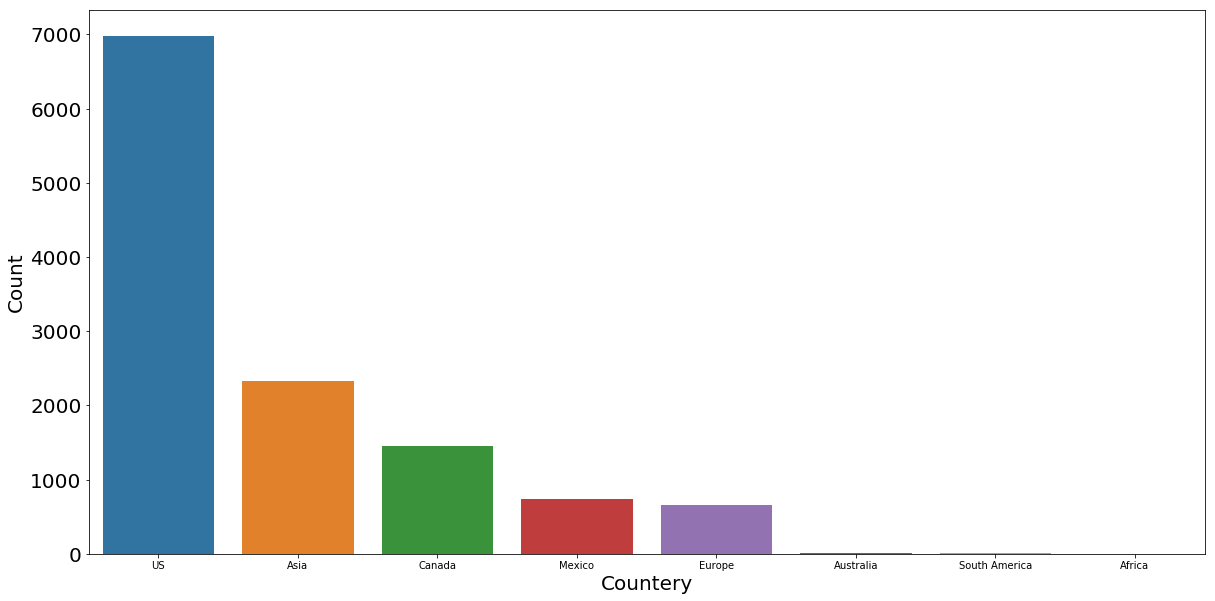

In [36]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x= 'origin', data=df_car,  order = df_car['origin'].value_counts().index)
#plt.title('COuntries the vehicle is made', )
plt.yticks(fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Countery', fontsize=20)
plt.show()

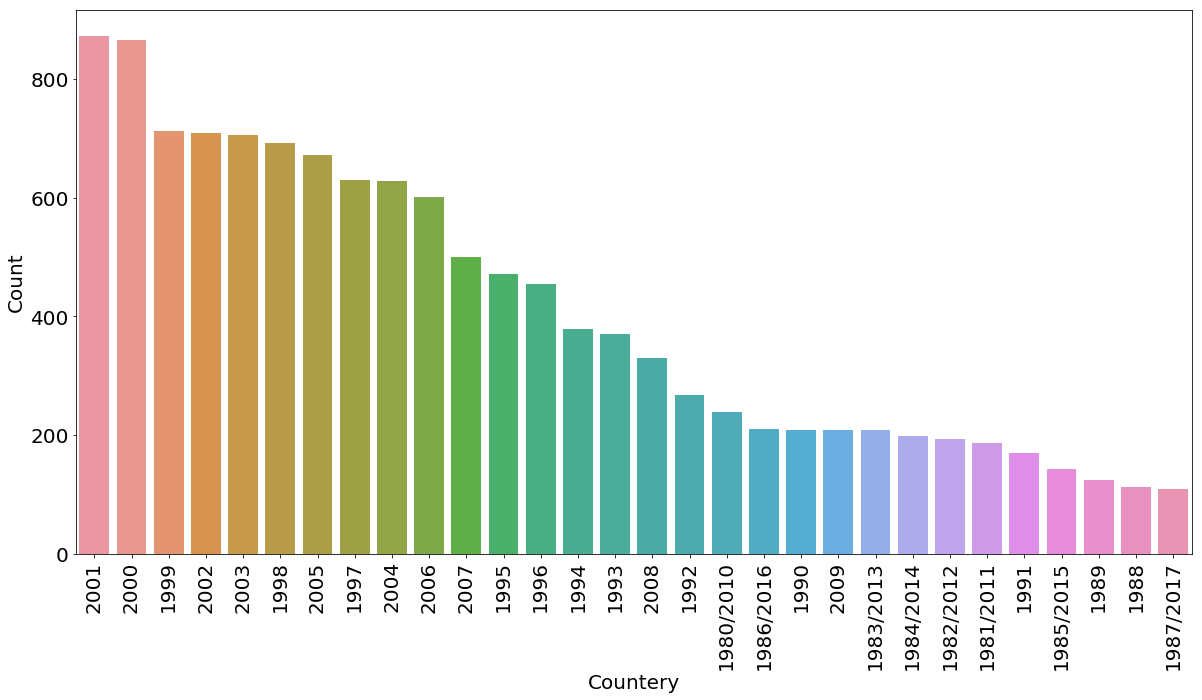

In [37]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x= 'year', data=df_car, order = df_car['year'].value_counts().index)
#plt.title('COuntries the vehicle is made', )
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Countery', fontsize=20)
plt.show()

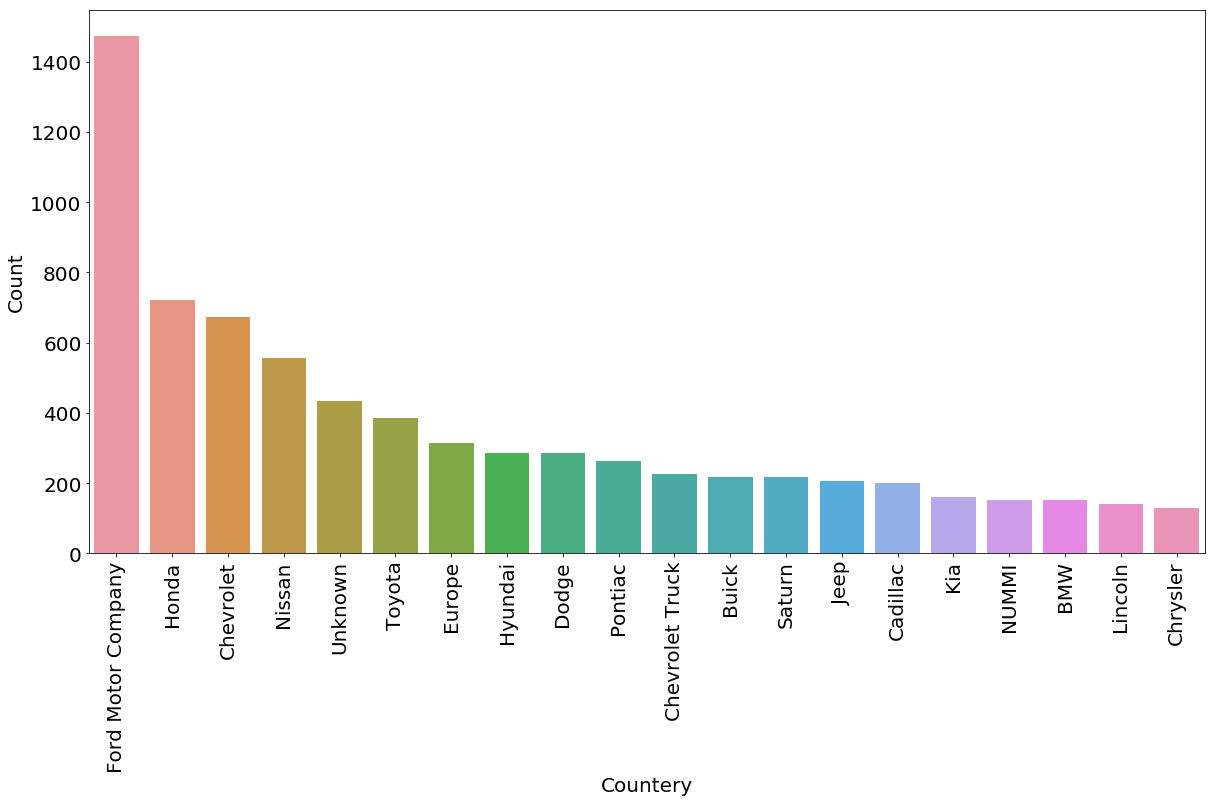

In [38]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x= 'manufacturer', data=df_car, order = df_car['manufacturer'].value_counts().head(20).index)
#plt.title('COuntries the vehicle is made', )
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Countery', fontsize=20)
plt.show()

In [63]:
cats = list(set(df_car[df_car['manufacturer'].isin(list(MODEL.values()))].manufacturer))
print(cats)

['Chrysler', 'Dodge', 'Chevrolet', 'Hyundai', 'BMW', 'Honda', 'Unknown', 'Nissan', 'NUMMI', 'Europe', 'Mercedes-Benz', 'Kia', 'Pontiac', 'Volkswagen Mexico', 'Oldsmobile', 'Chevrolet Truck', 'Saturn', 'Lincoln', 'Buick', 'Ford Motor Company', 'Nissan Mexico', 'Cadillac', 'General Motors', 'Jeep', 'Toyota']


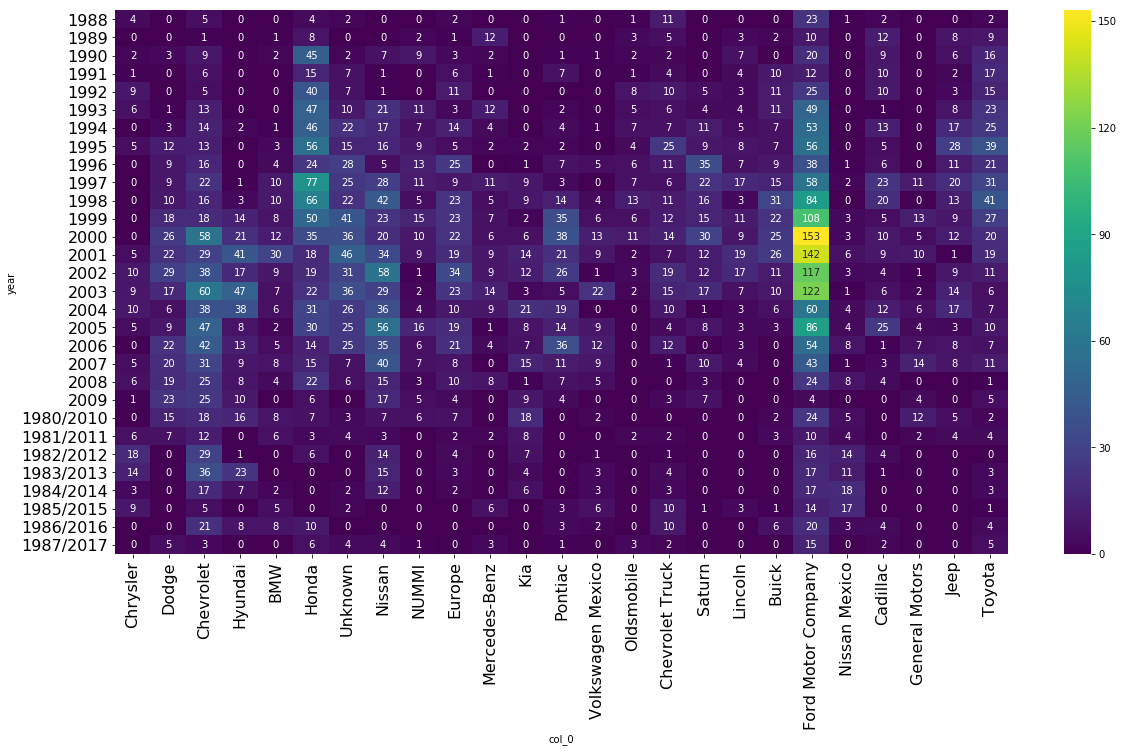

In [68]:
df_temp = pd.crosstab(df_car['year'], pd.Categorical(df_car['manufacturer'], categories=cats, ordered=True))
plt.figure(figsize=(20,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(df_temp, annot=True, fmt="g", cmap='viridis',)

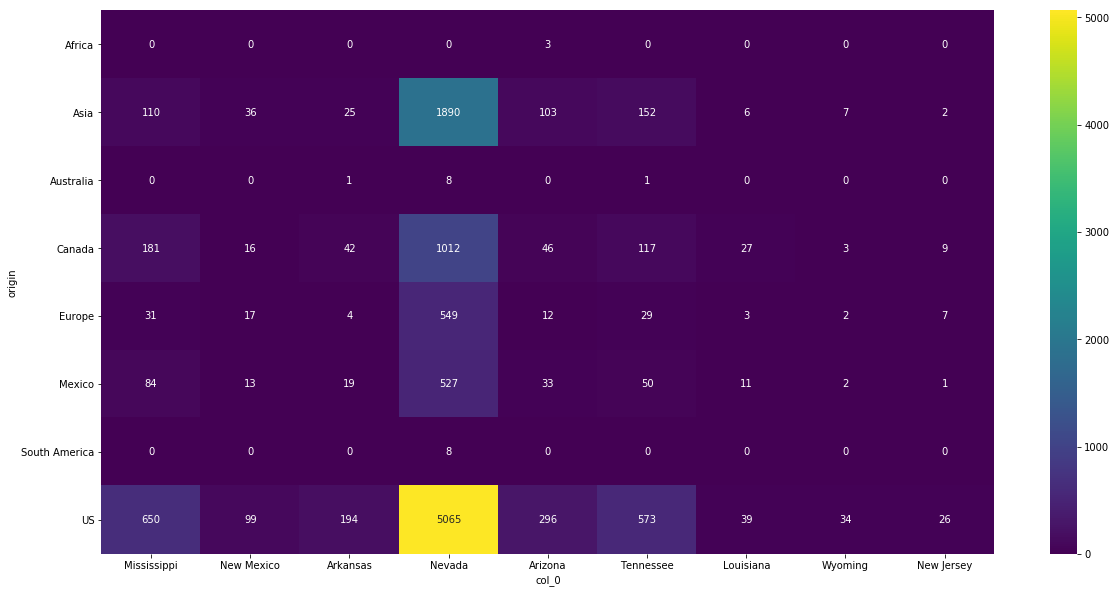

In [110]:
cats = df_car.state.unique()

df_temp = pd.crosstab(df_car['origin'], pd.Categorical(df_car['state'], categories=cats, ordered=True))
plt.figure(figsize=(20,10))
sns.heatmap(df_temp, annot=True, fmt="g", cmap='viridis',)